# Customer Churn Analysis
Churn Rate - the annual percentage rate at which customers stop subscribing to a service or employees leave a job. Global Businesses need to keep a track of the customers (or employees) to whom they are providing their service. Churn of existing customers causes loss to the businesses. Also, it is difficult to acquire new customers and it requires more cost as well. Hence, it becomes important for the companies to retain their existing customers.

A company can compare its new subscribers versus its loss of subscribers to determine both its churn rate and growth rate to see if there was overall growth or loss in a specific time period.

For the same, Churn Analysis method is useful in prediction of the churn in customers, existing or new i.e. a technique that helps to find out which customer is more likely to churn in the given period of time.

Supervised Classification Problem.
Possible Models that can be built – Logistic Regression, KNN, SVM, CART DT.



# Importing Necessary libraries¶

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as pe
from warnings import filterwarnings
filterwarnings("ignore")

# Importing Dataset

In [29]:
df = pd.read_csv("Churn.csv", index_col=0)
df

state      area.code  account.length voice.plan  voice.messages  \
1       KS  area_code_415             128        yes              25   
2       OH  area_code_415             107        yes              26   
3       NJ  area_code_415             137         no               0   
4       OH  area_code_408              84         no               0   
5       OK  area_code_415              75         no               0   
...    ...            ...             ...        ...             ...   
4996    HI  area_code_408              50        yes              40   
4997    WV  area_code_415             152         no               0   
4998    DC  area_code_415              61         no               0   
4999    DC  area_code_510             109         no               0   
5000    VT  area_code_415              86        yes              34   

     intl.plan  intl.mins  intl.calls  intl.charge  day.mins  day.calls  \
1           no       10.0           3         2.70     265.1        110   
2           no       13.7           3         3.70     161.6        123   
3           no       12.2           5         3.29     243.4        114   
4          yes        6.6           7         1.78     299.4         71   
5          yes       10.1           3         2.73     166.7        113   
...        ...        ...         ...          ...       ...        ...   
4996        no        9.9           5         2.67     235.7        127   
4997        no       14.7           2         3.97     184.2         90   
4998        no       13.6           4         3.67     140.6         89   
4999        no        8.5           6         2.30     188.8         67   
5000        no        9.3          16         2.51     129.4        102   

     day.charge eve.mins  eve.calls  eve.charge  night.mins  night.calls  \
1         45.07    197.4         99       16.78       244.7           91   
2         27.47    195.5        103       16.62       254.4          103   
3         41.38    121.2        110       10.30       162.6          104   
4          50.9     61.9         88        5.26       196.9           89   
5         28.34    148.3        122       12.61       186.9          121   
...         ...      ...        ...         ...         ...          ...   
4996      40.07      223        126       18.96       297.5          116   
4997      31.31    256.8         73       21.83       213.6          113   
4998       23.9    172.8        128       14.69       212.4           97   
4999       32.1    171.7         92       14.59       224.4           89   
5000         22    267.1        104       22.70       154.8          100   

      night.charge  customer.calls churn  
1            11.01               1    no  
2            11.45               1    no  
3             7.32               0    no  
4             8.86               2    no  
5             8.41               3    no  
...            ...             ...   ...  
4996         13.39               2    no  
4997          9.61               3   yes  
4998          9.56               1    no  
4999         10.10               0    no  
5000          6.97               0    no  

[5000 rows x 20 columns]

In [30]:
df= df.rename(columns={'area.code':'Area_code','night.charge':'Night_charge','intl.charge':'International_charge','day.charge':'Day_charge', 'eve.charge':'Evening_charge','voice.plan':'Voice_plan','account.length':'Account_length', 'voice.messages': 'Voice_messages','intl.plan':'International_plan' ,'intl.mins':'International_mins','intl.calls':'International_calls', 'day.mins': 'Day_mins', 'day.calls': 'Day_calls', 'eve.mins':'Evening_mins', 'eve.calls':'Evening_calls', 'night.mins':'Night_mins','night.calls':'Night_calls', 'customer.calls':'Customer_calls'})

# Data Insights

In [31]:
df.shape

(5000, 20)

In [32]:
df.describe()

Account_length  Voice_messages  International_mins  \
count      5000.00000     5000.000000         5000.000000   
mean        100.25860        7.755200           10.261780   
std          39.69456       13.546393            2.761396   
min           1.00000        0.000000            0.000000   
25%          73.00000        0.000000            8.500000   
50%         100.00000        0.000000           10.300000   
75%         127.00000       17.000000           12.000000   
max         243.00000       52.000000           20.000000   

       International_calls  International_charge     Day_mins    Day_calls  \
count          5000.000000           5000.000000  5000.000000  5000.000000   
mean              4.435200              2.771196   180.288900   100.029400   
std               2.456788              0.745514    53.894699    19.831197   
min               0.000000              0.000000     0.000000     0.000000   
25%               3.000000              2.300000   143.700000    87.000000   
50%               4.000000              2.780000   180.100000   100.000000   
75%               6.000000              3.240000   216.200000   113.000000   
max              20.000000              5.400000   351.500000   165.000000   

       Evening_calls  Evening_charge   Night_mins  Night_calls  Night_charge  \
count    5000.000000     5000.000000  5000.000000  5000.000000   5000.000000   
mean      100.191000       17.054322   200.391620    99.919200      9.017732   
std        19.826496        4.296843    50.527789    19.958686      2.273763   
min         0.000000        0.000000     0.000000     0.000000      0.000000   
25%        87.000000       14.140000   166.900000    87.000000      7.510000   
50%       100.000000       17.090000   200.400000   100.000000      9.020000   
75%       114.000000       19.900000   234.700000   113.000000     10.560000   
max       170.000000       30.910000   395.000000   175.000000     17.770000   

       Customer_calls  
count     5000.000000  
mean         1.570400  
std          1.306363  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          2.000000  
max          9.000000

Less number of people call the customer care.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 5000 non-null   object 
 1   Area_code             5000 non-null   object 
 2   Account_length        5000 non-null   int64  
 3   Voice_plan            5000 non-null   object 
 4   Voice_messages        5000 non-null   int64  
 5   International_plan    5000 non-null   object 
 6   International_mins    5000 non-null   float64
 7   International_calls   5000 non-null   int64  
 8   International_charge  5000 non-null   float64
 9   Day_mins              5000 non-null   float64
 10  Day_calls             5000 non-null   int64  
 11  Day_charge            5000 non-null   object 
 12  Evening_mins          5000 non-null   object 
 13  Evening_calls         5000 non-null   int64  
 14  Evening_charge        5000 non-null   float64
 15  Night_mins           

In [34]:
df.isna().sum()

state                   0
Area_code               0
Account_length          0
Voice_plan              0
Voice_messages          0
International_plan      0
International_mins      0
International_calls     0
International_charge    0
Day_mins                0
Day_calls               0
Day_charge              0
Evening_mins            0
Evening_calls           0
Evening_charge          0
Night_mins              0
Night_calls             0
Night_charge            0
Customer_calls          0
churn                   0
dtype: int64

# Checking for Duplicated Values

In [35]:
df.duplicated().sum()

0

No duplicated values

# Checking for Null Values

## Columns 'eve.mins' and 'day.charge' are showing dtypes as object. Hence Nan values need to be removed.

In [36]:
df['Evening_mins'].unique()[0:100]

array(['197.4', '195.5', '121.2', '61.9', '148.3', '220.6', '348.5',
       '103.1', '351.6', '222', '228.5', '163.4', '104.9', '247.6',
       '307.2', '317.8', '280.9', '218.2', '212.8', '159.5', '239.7',
       '169.9', '72.9', '137.3', '245.2', '277.1', '191.1', '155.5',
       '258.2', '215.1', '136.7', '201.5', '31.2', '252.4', '195',
       '217.3', '162.5', '223.7', '187.6', '271.8', '166.8', '203.9',
       '282.2', '165.3', '225.8', '213', '162.6', '134.6', '231.3',
       '217.2', '269.8', '211.1', '190.2', '267.5', '219.7', '249.3',
       '180', '75.3', '246.5', '177.4', '178.2', '246.1', '187.8',
       '162.9', '169.5', '206.4', '216.9', '169.1', '170.5', '188.2',
       '148.9', '226.7', '157.2', '223.3', '181', '77.1', '164.4',
       '155.2', '303.5', '204.8', '136.1', '259.7', '249.2', '225.9',
       '155', '208.5', '123.4', 'Nan', '194.9', '190.9', '173', '178.4',
       '190.6', '81', '213.3', '207.3', '209.4', '205.7', '252.2', '189'],
      dtype=object)

In [37]:
df["Day_charge"].unique()[0:100]

array(['45.07', '27.47', '41.38', '50.9', '28.34', '37.98', '37.09',
       '26.69', '31.37', '43.96', '21.95', '31.91', 'Nan', '26.62',
       '20.52', '56.59', '33.39', '32.42', '32.25', '38.15', '26.37',
       '10.61', '31.11', '18.77', '13.79', '21.13', '36.21', '32.3',
       '20.28', '14.42', '38.44', '36.04', '42.43', '30.06', '37.4',
       '24.87', '22.24', '34.66', '23.87', '21.47', '29.43', '21.22',
       '14.59', '26.18', '20.55', '35.92', '27.05', '22.64', '32.62',
       '37.5', '31.64', '27.23', '25.67', '29.84', '21.57', '33.73',
       '25.3', '38.98', '32.66', '45.66', '32.93', '30.72', '22.3',
       '25.18', '42.76', '21.28', '35.97', '30.41', '41.11', '38.23',
       '42.26', '34.58', '40.09', '26.71', '51.05', '10.47', '36.4',
       '28.93', '34.19', '36.62', '28.15', '42.42', '35.8', '30.48',
       '26.84', '36.43', '26.2', '40.44', '24.46', '42.99', '30.45',
       '47.33', '27.22', '33.69', '36.06', '42.81', '27.4', '30.31',
       '25.79', '22.95'], dtype=

In [38]:
df["Evening_mins"] = pd.to_numeric(df["Evening_mins"], errors="coerce", downcast="integer")
df['Day_charge']= pd.to_numeric(df['Day_charge'],errors='coerce',downcast='integer')

In [39]:
df.dtypes

state                    object
Area_code                object
Account_length            int64
Voice_plan               object
Voice_messages            int64
International_plan       object
International_mins      float64
International_calls       int64
International_charge    float64
Day_mins                float64
Day_calls                 int64
Day_charge              float64
Evening_mins            float64
Evening_calls             int64
Evening_charge          float64
Night_mins              float64
Night_calls               int64
Night_charge            float64
Customer_calls            int64
churn                    object
dtype: object

In [40]:
df.isna().sum()

state                    0
Area_code                0
Account_length           0
Voice_plan               0
Voice_messages           0
International_plan       0
International_mins       0
International_calls      0
International_charge     0
Day_mins                 0
Day_calls                0
Day_charge               7
Evening_mins            24
Evening_calls            0
Evening_charge           0
Night_mins               0
Night_calls              0
Night_charge             0
Customer_calls           0
churn                    0
dtype: int64

Since the number null of values is very less, we drop those records.

In [41]:
df.dropna(inplace=True)

Dtype converted from object to float

# Correlation

In [44]:
sns.pairplot(df)

In [43]:
df.corr()

Account_length  Voice_messages  International_mins  \
Account_length              1.000000       -0.013682            0.004165   
Voice_messages             -0.013682        1.000000            0.001497   
International_mins          0.004165        0.001497            1.000000   
International_calls         0.014686       -0.000970            0.016604   
International_charge        0.004173        0.001539            0.999993   
Day_mins                   -0.000715        0.005641           -0.018335   
Day_calls                   0.027558        0.001008            0.014284   
Day_charge                 -0.000717        0.005636           -0.018339   
Evening_mins               -0.007600        0.018517           -0.000533   
Evening_calls               0.008187       -0.003682           -0.006097   
Evening_charge             -0.007597        0.018523           -0.000539   
Night_mins                  0.001229        0.004094           -0.006178   
Night_calls                -0.008077        0.001903            0.000429   
Night_charge                0.001218        0.004086           -0.006174   
Customer_calls             -0.002457       -0.006676           -0.010839   

                      International_calls  International_charge  Day_mins  \
Account_length                   0.014686              0.004173 -0.000715   
Voice_messages                  -0.000970              0.001539  0.005641   
International_mins               0.016604              0.999993 -0.018335   
International_calls              1.000000              0.016714 -0.000541   
International_charge             0.016714              1.000000 -0.018261   
Day_mins                        -0.000541             -0.018261  1.000000   
Day_calls                        0.011457              0.014348 -0.000342   
Day_charge                      -0.000544             -0.018265  1.000000   
Evening_mins                     0.007402             -0.000512 -0.011572   
Evening_calls                    0.006675             -0.006151  0.006587   
Evening_charge                   0.007407             -0.000518 -0.011581   
Night_mins                      -0.017202             -0.006119  0.011755   
Night_calls                      0.000008              0.000411  0.004091   
Night_charge                    -0.017172             -0.006114  0.011738   
Customer_calls                  -0.019519             -0.010893  0.002573   

                      Day_calls  Day_charge  Evening_mins  Evening_calls  \
Account_length         0.027558   -0.000717     -0.007600       0.008187   
Voice_messages         0.001008    0.005636      0.018517      -0.003682   
International_mins     0.014284   -0.018339     -0.000533      -0.006097   
International_calls    0.011457   -0.000544      0.007402       0.006675   
International_charge   0.014348   -0.018265     -0.000512      -0.006151   
Day_mins              -0.000342    1.000000     -0.011572       0.006587   
Day_calls              1.000000   -0.000342     -0.001526       0.001984   
Day_charge            -0.000342    1.000000     -0.011568       0.006588   
Evening_mins          -0.001526   -0.011568      1.000000       0.002429   
Evening_calls          0.001984    0.006588      0.002429       1.000000   
Evening_charge        -0.001522   -0.011578      1.000000       0.002444   
Night_mins             0.002023    0.011757     -0.017189       0.002049   
Night_calls           -0.008645    0.004090      0.016336      -0.012014   
Night_charge           0.002019    0.011740     -0.017191       0.002068   
Customer_calls        -0.010938    0.002567     -0.011936       0.005985   

                      Evening_charge  Night_mins  Night_calls  Night_charge  \
Account_length             -0.007597    0.001229    -0.008077      0.001218   
Voice_messages              0.018523    0.004094     0.001903      0.004086   
International_mins         -0.000539   -0.006178     0.000429     -0.006174   
International_calls         0.007407   

<Axes: >

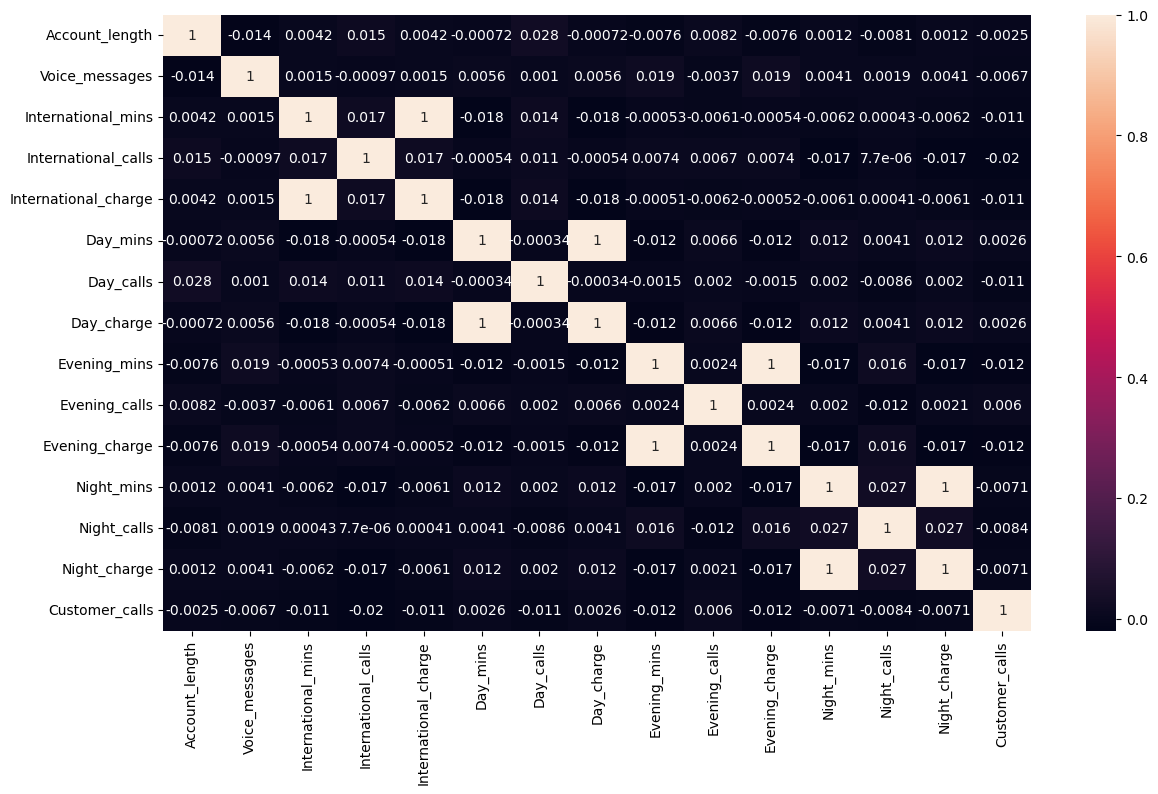

In [45]:
plt.figure(figsize= (14,8))
sns.heatmap(df.corr() ,annot = True)

The Pearson's correlation and PPS, both do not show any considerable score for correlation between the features and target column.



# Visualization

In [46]:
customers_retained = df[df['churn']=='no']['churn'].count()/df.shape * 100
customers_churned = df[df['churn']=='yes']['churn'].count()/df.shape * 100
customers_retained = np.round(customers_retained, 2)
customers_churned = np.round(customers_churned, 2)

In [50]:
df.columns

Index(['state', 'Area_code', 'Account_length', 'Voice_plan', 'Voice_messages',
       'International_plan', 'International_mins', 'International_calls',
       'International_charge', 'Day_mins', 'Day_calls', 'Day_charge',
       'Evening_mins', 'Evening_calls', 'Evening_charge', 'Night_mins',
       'Night_calls', 'Night_charge', 'Customer_calls', 'churn'],
      dtype='object')

<Figure size 300x200 with 0 Axes>

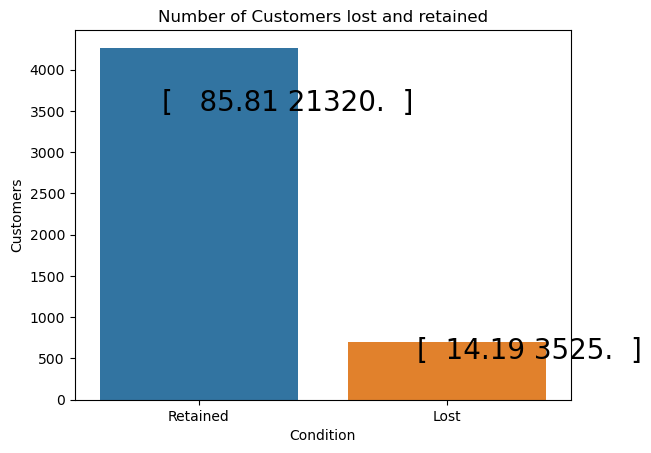

<Figure size 300x200 with 0 Axes>

In [59]:
sns.countplot(data = df, x = 'churn')
plt.xticks([0, 1], ['Retained', 'Lost'])
plt.ylabel("Customers", size = 10)
plt.xlabel("Condition", size = 10)
plt.title("Number of Customers lost and retained")
plt.text(-0.15, 3500, customers_retained, fontsize=20)
plt.text(0.88, 500, customers_churned, fontsize=20)
plt.axes
plt.figure(figsize=(3, 2))

We can observe that 14.19% of our customers have churned.

<Figure size 500x300 with 0 Axes>

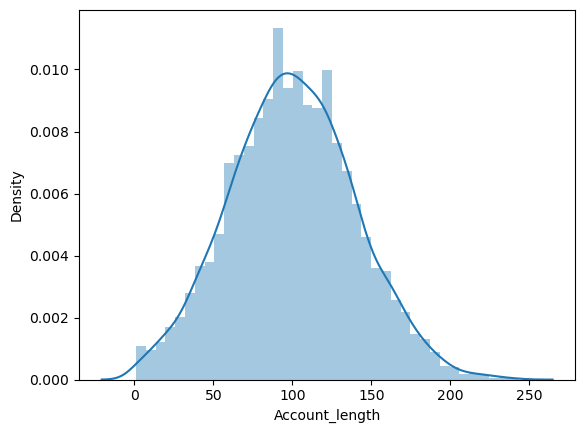

<Figure size 500x300 with 0 Axes>

In [60]:
sns.distplot(df['Account_length'])
plt.figure(figsize=(5, 3))

In [61]:
def stacked_plot(df, group, target):
    fig, ax = plt.subplots(figsize=(6,4))
    temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
    temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["green", "darkred"])
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel(group)
    ax.set_ylabel('Churn Percentage')

# Categorical variables and churn rate

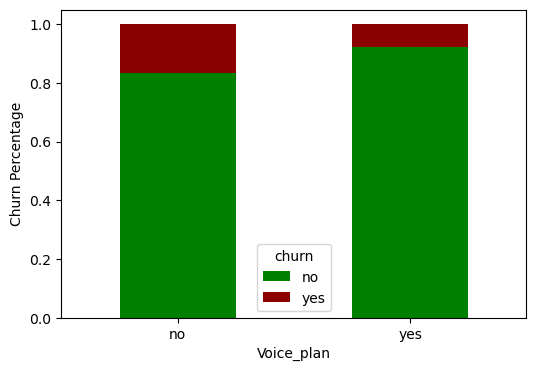

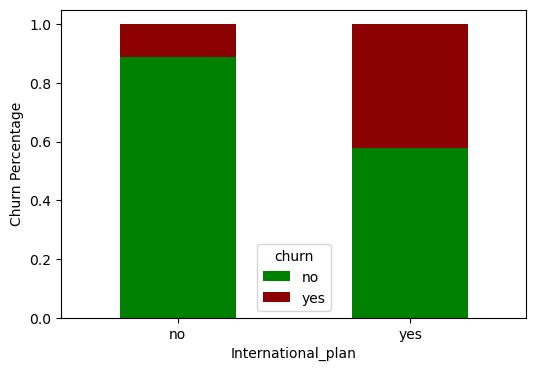

In [62]:
stacked_plot(df, 'Voice_plan', 'churn')
stacked_plot(df, 'International_plan', 'churn')

- A customer is likely to churn out who has subscribed to an international plan.
- A customer is likely to churn out who has not subscribed to voice plan.

# Churn relationship with area

<Axes: xlabel='Area_code', ylabel='count'>

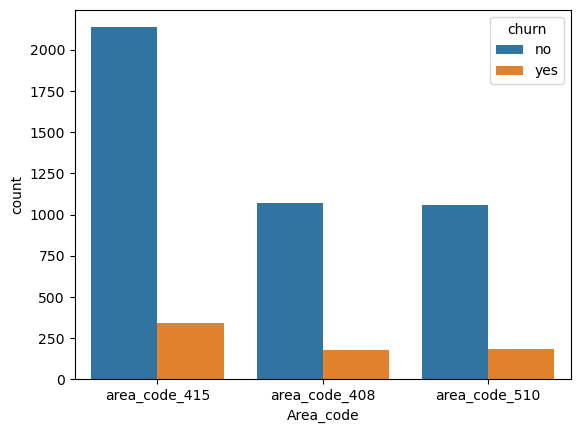

In [63]:
sns.countplot(data=df,x= 'Area_code',hue= "churn")

- No strong relationship can be established based on area of calls.
- Hence we drop the column.

In [65]:
df = df.drop(columns=['state', 'Area_code'])

## Customer calls

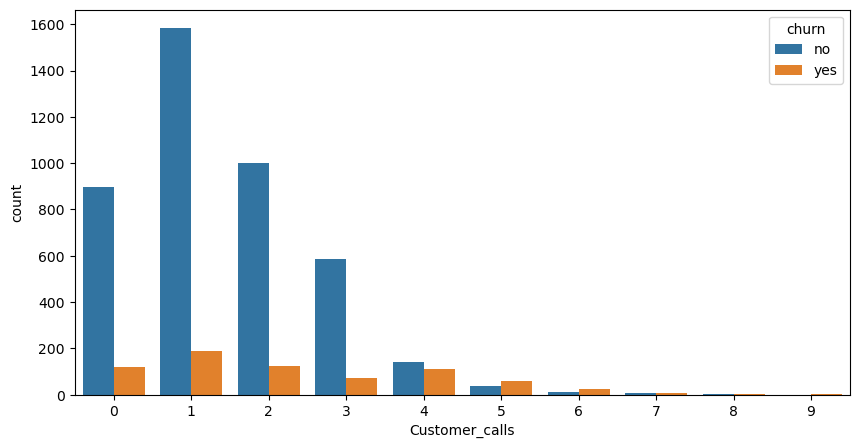

In [66]:
plt.figure(figsize=(10,5))
sns.countplot(x="Customer_calls", hue="churn", data=df)
plt.show()

- As the number of calls to the customer service increases, the customer is likely to churn out

### Analyzing the relation of 'day.mins','day.charge','eve.mins','eve.charge','night.mins','night.charge' w.r.t. Churn rate

<Figure size 300x200 with 0 Axes>

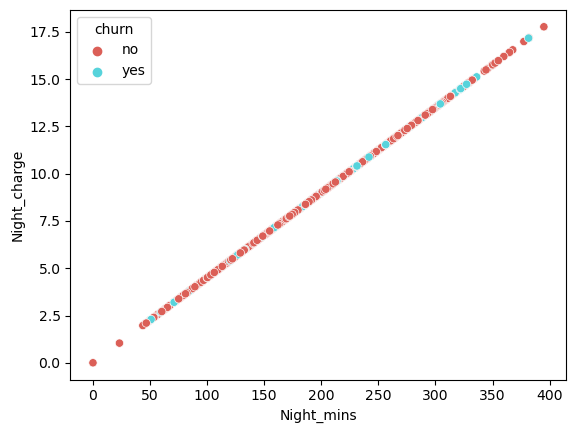

<Figure size 300x200 with 0 Axes>

In [67]:
sns.scatterplot(x='Night_mins',y='Night_charge',hue='churn',data=df,palette='hls')
plt.figure(figsize=(3, 2))

<Figure size 300x200 with 0 Axes>

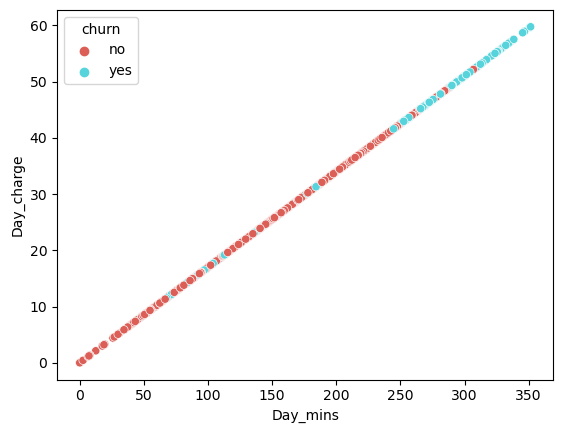

<Figure size 300x200 with 0 Axes>

In [68]:
sns.scatterplot(x='Day_mins',y='Day_charge',hue='churn',data=df,palette='hls')
plt.figure(figsize=(3, 2))

<Figure size 300x200 with 0 Axes>

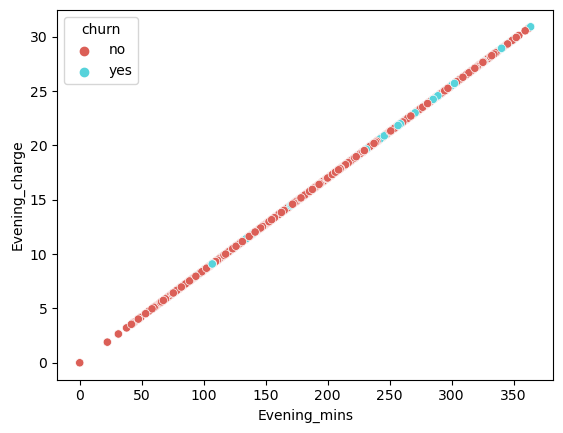

<Figure size 300x200 with 0 Axes>

In [69]:
sns.scatterplot(x='Evening_mins',y='Evening_charge',hue='churn',data=df,palette='hls')
plt.figure(figsize=(3, 2))

<Figure size 300x200 with 0 Axes>

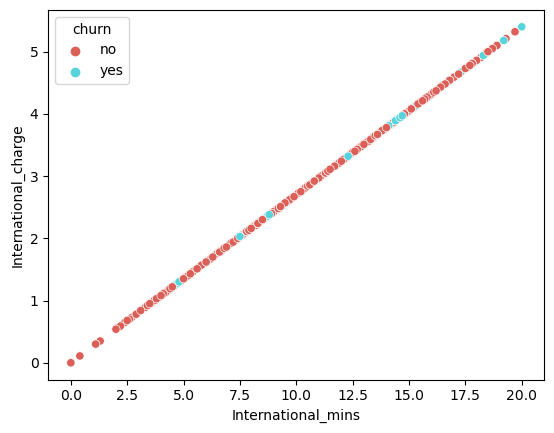

<Figure size 300x200 with 0 Axes>

In [70]:
sns.scatterplot(x='International_mins',y='International_charge',hue='churn',data=df,palette='hls')
plt.figure(figsize=(3, 2))

In [71]:
# Deriving a relation between overall call charge and overall call minutes  
day = df['Day_charge'].mean()/df['Day_mins'].mean()
night = df['Night_charge'].mean()/df['Night_mins'].mean()
evening = df['Evening_charge'].mean()/df['Evening_mins'].mean()
international = df['International_charge'].mean()/df['International_mins'].mean()

<Figure size 300x200 with 0 Axes>

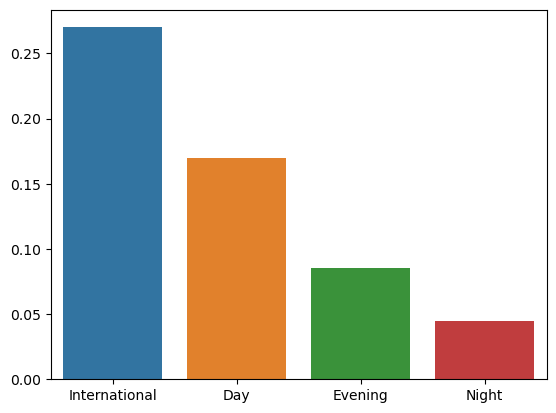

<Figure size 300x200 with 0 Axes>

In [72]:
sns.barplot(x=['International', 'Day', 'Evening', 'Night'], y = [international, day, evening, night])
plt.figure(figsize=(3, 2))

- The call charge to minutes ratio for International and daytime calls is higher resulting into high churn rate.
- 'day.mins' and 'day.charge' have a linear relationship. As the day mins increase, the charges also increase, reulting into more churn.
- Whereas, no churn has been observed in case of international, evening and night calls, as the timing and charges increase.

# Conclusion

1. Features like area.code, account.length, voice.messages have no significant effect on the churn rate.
2. A customer is likely to churn out who has subscribed to an international plan. Reason might be higher charges for those subscribed to international calls compared to the ones who have not.
3. Customers with a voice plan has not churned much. This shows the customer satisfaction regarding the voice plan services.
4. As the day mins increase, the charges also increase, reulting into churning. A similar case is not during evening, night and international calls.
5. Columns like intl.charge, day.charge, night.charge, eve.charge have a linear relationship with intl.mins, day.mins, night.mins, eve.mins respectively. For simplifying we may drop these columns.
6. Customers with high customer care calls result in high churn rate.

# Retaining customers

1. Decrease the subscription rates of international plan.
2. Decrease in the daytime charges or providing some daytime offer will result in less churn.
3. Improve customer call service to limit the number of customer calls.

# Checking for Outliers

In [75]:
df_out = df.copy()
df_out

Account_length Voice_plan  Voice_messages International_plan  \
1                128        yes              25                 no   
2                107        yes              26                 no   
3                137         no               0                 no   
4                 84         no               0                yes   
5                 75         no               0                yes   
...              ...        ...             ...                ...   
4996              50        yes              40                 no   
4997             152         no               0                 no   
4998              61         no               0                 no   
4999             109         no               0                 no   
5000              86        yes              34                 no   

      International_mins  International_calls  International_charge  Day_mins  \
1                   10.0                    3                  2.70     265.1   
2                   13.7                    3                  3.70     161.6   
3                   12.2                    5                  3.29     243.4   
4                    6.6                    7                  1.78     299.4   
5                   10.1                    3                  2.73     166.7   
...                  ...                  ...                   ...       ...   
4996                 9.9                    5                  2.67     235.7   
4997                14.7                    2                  3.97     184.2   
4998                13.6                    4                  3.67     140.6   
4999                 8.5                    6                  2.30     188.8   
5000                 9.3                   16                  2.51     129.4   

      Day_calls  Day_charge  Evening_mins  Evening_calls  Evening_charge  \
1           110       45.07         197.4             99           16.78   
2           123       27.47         195.5            103           16.62   
3           114       41.38         121.2            110           10.30   
4            71       50.90          61.9             88            5.26   
5           113       28.34         148.3            122           12.61   
...         ...         ...           ...            ...             ...   
4996        127       40.07         223.0            126           18.96   
4997         90       31.31         256.8             73           21.83   
4998         89       23.90         172.8            128           14.69   
4999         67       32.10         171.7             92           14.59   
5000        102       22.00         267.1            104           22.70   

      Night_mins  Night_calls  Night_charge  Customer_calls churn  
1          244.7           91         11.01               1    no  
2          254.4          103         11.45               1    no  
3          162.6          104          7.32               0    no  
4          196.9           89          8.86               2    no  
5          186.9          121          8.41               3    no  
...          ...          ...           ...             ...   ...  
4996       297.5          116         13.39               2    no  
4997       213.6          113          9.61               3   yes  
4998       212.4           97          9.56               1    no  
4999       224.4           89         10.10               0    no  
5000       154.8          100          6.97               0    no  

[4969 rows x 18 columns]

In [76]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [77]:
oe = OrdinalEncoder()
le = LabelEncoder()

In [78]:
df_out[['Voice_plan', 'International_plan']] = oe.fit_transform(df_out[['Voice_plan', 'International_plan']])

<Axes: >

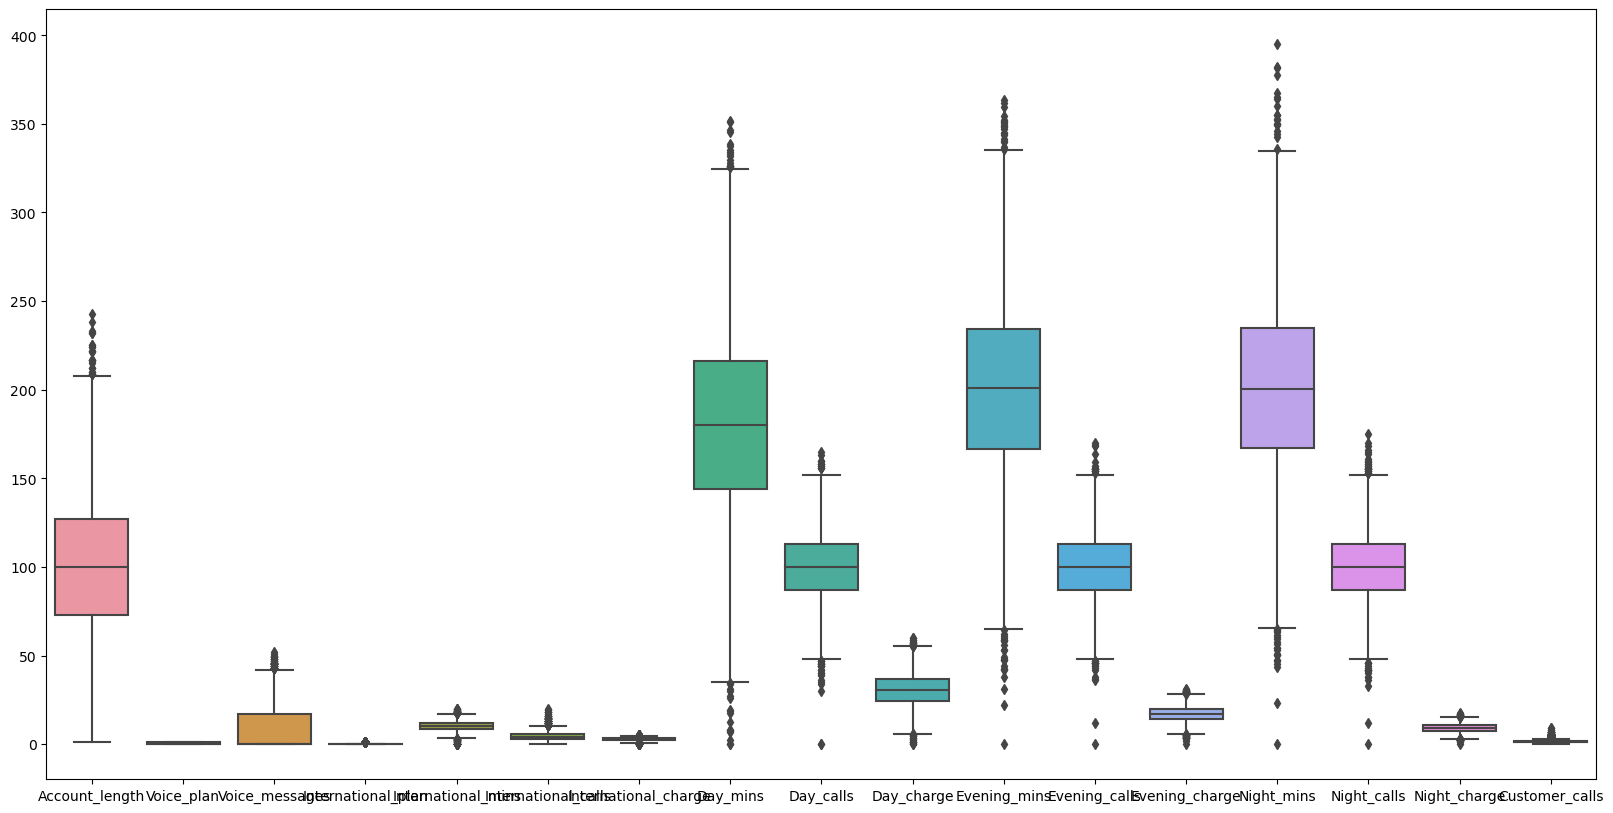

In [80]:
plt.rcParams['figure.figsize'] = (20,10)
sns.boxplot(data=df_out)

## IF outlier detection

In [81]:
from sklearn.ensemble import IsolationForest

In [82]:
iso = IsolationForest(random_state=20, contamination=0.1)

In [85]:
outliers = iso.fit_predict(df_out.iloc[:,:-1])
df_out['Outliers'] = outliers

In [86]:
df_out["Outliers"].value_counts()

 1    4472
-1     497
Name: Outliers, dtype: int64

In [88]:
df_out[df_out['Outliers']==-1]

Account_length  Voice_plan  Voice_messages  International_plan  \
4                 84         0.0               0                 1.0   
10               141         1.0              37                 1.0   
16               161         0.0               0                 0.0   
17                85         1.0              27                 0.0   
22                77         0.0               0                 0.0   
...              ...         ...             ...                 ...   
4949             114         1.0              28                 1.0   
4960             137         0.0               0                 1.0   
4964              47         1.0              31                 1.0   
4972             128         1.0              28                 0.0   
4988             127         1.0              27                 0.0   

      International_mins  International_calls  International_charge  Day_mins  \
4                    6.6                    7                  1.78     299.4   
10                  11.2                    5                  3.02     258.6   
16                   5.4                    9                  1.46     332.9   
17                  13.8                    4                  3.73     196.4   
22                   5.7                    6                  1.54      62.4   
...                  ...                  ...                   ...       ...   
4949                14.6                    4                  3.94     136.4   
4960                10.6                    2                  2.86     312.4   
4964                 9.7                    4                  2.62     140.6   
4972                17.7                    4                  4.78     115.4   
4988                 8.0                    4                  2.16     157.6   

      Day_calls  Day_charge  Evening_mins  Evening_calls  Evening_charge  \
4            71       50.90          61.9             88            5.26   
10           84       43.96         222.0            111           18.87   
16           67       56.59         317.8             97           27.01   
17          139       33.39         280.9             90           23.88   
22           89       10.61         169.9            121           14.44   
...         ...         ...           ...            ...             ...   
4949         93       23.19         170.0             90           14.45   
4960        110       53.11         231.1             73           19.64   
4964        114       23.90         264.6             44           22.49   
4972         96       19.62         185.4             94           15.76   
4988        107       26.79         280.6             49           23.85   

      Night_mins  Night_calls  Night_charge  Customer_calls churn  Outliers  
4          196.9           89          8.86               2    no        -1  
10         326.4           97         14.69               0    no        -1  
16         160.6          128          7.23               4   yes        -1  
17          89.3           75          4.02               1    no        -1  
22         209.6           64          9.43               5   yes        -1  
...          ...          ...           ...             ...   ...       ...  
4949       191.5           73          8.62               2   yes        -1  
4960       120.1           78          5.40               1   yes        -1  
4964       238.7          121         10.74               2    no        -1  
4972       209.3           69          9.42               0    no        -1  
4988        75.1           77          3.38               1    no        -1  

[497 rows x 19 columns]

- 497 Outliers

In [89]:
Outlier_percent = (len(df_out[df_out['Outliers']==-1])/len(df_out))*100
Outlier_percent

10.00201247735963

# Encoding the categorical columns

In [90]:
df[['Voice_plan', 'International_plan']] = oe.fit_transform(df[['Voice_plan', 'International_plan']])

# Encoding the target column

In [92]:
df['churn'] = le.fit_transform(df['churn'])

# Feature Engineering

In [94]:
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [98]:
x = df.drop("churn",axis = 1)
y = df.churn

# PPS Score

In [100]:
import ppscore as ps

In [101]:
score = ps.matrix(df_out)

In [102]:
score[score['y']=='churn']

x      y       ppscore            case  \
17         Account_length  churn  0.000000e+00  classification   
36             Voice_plan  churn  8.483278e-07  classification   
55         Voice_messages  churn  0.000000e+00  classification   
74     International_plan  churn  8.483278e-07  classification   
93     International_mins  churn  3.975044e-03  classification   
112   International_calls  churn  8.483278e-07  classification   
131  International_charge  churn  3.975044e-03  classification   
150              Day_mins  churn  1.076859e-01  classification   
169             Day_calls  churn  1.736848e-03  classification   
188            Day_charge  churn  1.135527e-01  classification   
207          Evening_mins  churn  0.000000e+00  classification   
226         Evening_calls  churn  0.000000e+00  classification   
245        Evening_charge  churn  0.000000e+00  classification   
264            Night_mins  churn  0.000000e+00  classification   
283           Night_calls  churn  1.356625e-03  classification   
302          Night_charge  churn  0.000000e+00  classification   
321        Customer_calls  churn  1.421376e-01  classification   
340                 churn  churn  1.000000e+00  predict_itself   
359              Outliers  churn  8.483278e-07  classification   

     is_valid_score       metric  baseline_score  model_score  \
17             True  weighted F1        0.792597     0.792077   
36             True  weighted F1        0.792597     0.792597   
55             True  weighted F1        0.792597     0.792397   
74             True  weighted F1        0.792597     0.792597   
93             True  weighted F1        0.792597     0.793422   
112            True  weighted F1        0.792597     0.792597   
131            True  weighted F1        0.792597     0.793422   
150            True  weighted F1        0.792597     0.814932   
169            True  weighted F1        0.792597     0.792957   
188            True  weighted F1        0.792597     0.816148   
207            True  weighted F1        0.792597     0.782297   
226            True  weighted F1        0.792597     0.792397   
245            True  weighted F1        0.792597     0.782511   
264            True  weighted F1        0.792597     0.774994   
283            True  weighted F1        0.792597     0.792879   
302            True  weighted F1        0.792597     0.784148   
321            True  weighted F1        0.792597     0.822077   
340            True         None        0.000000     1.000000   
359            True  weighted F1        0.792597     0.792597   

                        model  
17   DecisionTreeClassifier()  
36   DecisionTreeClassifier()  
55   DecisionTreeClassifier()  
74   DecisionTreeClassifier()  
93   DecisionTreeClassifier()  
112  DecisionTreeClassifier()  
131  DecisionTreeClassifier()  
150  DecisionTreeClassifier()  
169  DecisionTreeClassifier()  
188  DecisionTreeClassifier()  
207  DecisionTreeClassifier()  
226  DecisionTreeClassifier()  
245  DecisionTreeClassifier()  
264  DecisionTreeClassifier()  
283  DecisionTreeClassifier()  
302  DecisionTreeClassifier()  
321  DecisionTreeClassifier()  
340                      None  
359  DecisionTreeClassifier()

The Pearson's correlation and PPS, both do not show any considerable score for correlation between the features and target column.



# Univariate Selection

In [103]:
# Chi Square Test
test = SelectKBest(score_func=chi2, k =5)
chi_score = test.fit(x, y)

In [104]:
chi_score.scores_

array([3.54654529e+01, 4.57368976e+01, 1.14251282e+03, 3.05958303e+02,
       1.42091689e+01, 1.46659974e+01, 3.83420936e+00, 3.46590253e+03,
       5.04530237e+00, 5.89160894e+02, 5.02409494e+02, 5.97518524e-01,
       4.26973103e+01, 1.30939624e+02, 8.97285173e-01, 5.89111049e+00,
       2.46103231e+02])

In [105]:
score = pd.DataFrame(chi_score.scores_).T
score.columns = x.columns
score

Account_length  Voice_plan  Voice_messages  International_plan  \
0       35.465453   45.736898     1142.512819          305.958303   

   International_mins  International_calls  International_charge     Day_mins  \
0           14.209169            14.665997              3.834209  3465.902526   

   Day_calls  Day_charge  Evening_mins  Evening_calls  Evening_charge  \
0   5.045302  589.160894    502.409494       0.597519        42.69731   

   Night_mins  Night_calls  Night_charge  Customer_calls  
0  130.939624     0.897285       5.89111      246.103231

# Recursive Feature Elemination

In [106]:
lg = LogisticRegression()
rfe = RFE(lg)
rfe.fit(x,y)

RFE(estimator=LogisticRegression())

In [107]:
rfe.n_features_

8

In [108]:
rfe.support_

array([False,  True,  True,  True, False,  True, False,  True, False,
       False, False,  True, False, False,  True, False,  True])

In [109]:
rfe.ranking_

array([ 5,  1,  1,  1,  3,  1,  4,  1,  2,  6,  8,  1, 10,  7,  1,  9,  1])

In [110]:
score2 = pd.DataFrame(rfe.ranking_).T
score2.columns = x.columns
score2

Account_length  Voice_plan  Voice_messages  International_plan  \
0               5           1               1                   1   

   International_mins  International_calls  International_charge  Day_mins  \
0                   3                    1                     4         1   

   Day_calls  Day_charge  Evening_mins  Evening_calls  Evening_charge  \
0          2           6             8              1              10   

   Night_mins  Night_calls  Night_charge  Customer_calls  
0           7            1             9               1

In [111]:
score2 = pd.DataFrame(rfe.support_).T
score2.columns = x.columns
score2

Account_length  Voice_plan  Voice_messages  International_plan  \
0           False        True            True                True   

   International_mins  International_calls  International_charge  Day_mins  \
0               False                 True                 False      True   

   Day_calls  Day_charge  Evening_mins  Evening_calls  Evening_charge  \
0      False       False         False           True           False   

   Night_mins  Night_calls  Night_charge  Customer_calls  
0       False         True         False            True

# Tree Based Method

In [112]:
dt = DecisionTreeClassifier()
dt.fit(x,y)
dt.feature_importances_

array([0.01604065, 0.01840656, 0.04781995, 0.06870826, 0.01886724,
       0.08239002, 0.09908226, 0.10716741, 0.02402178, 0.15463656,
       0.06446072, 0.01563014, 0.08099937, 0.02868103, 0.01249173,
       0.05334236, 0.10725396])

In [113]:
score3 = pd.DataFrame(dt.feature_importances_).T
score3.columns = x.columns
score3

Account_length  Voice_plan  Voice_messages  International_plan  \
0        0.016041    0.018407         0.04782            0.068708   

   International_mins  International_calls  International_charge  Day_mins  \
0            0.018867              0.08239              0.099082  0.107167   

   Day_calls  Day_charge  Evening_mins  Evening_calls  Evening_charge  \
0   0.024022    0.154637      0.064461        0.01563        0.080999   

   Night_mins  Night_calls  Night_charge  Customer_calls  
0    0.028681     0.012492      0.053342        0.107254

- As per PPS; Customer_calls, Day_charge, Day_mins are relevant.

- As per Univariate Selection, Voice_messages, Day_mins, Day_charge, Evening_mins, International_plan, Night_mins are relevant.

- As per RFE, Evening_charge, Night_charge, Night_mins, Day_charge, Account_length, Evening_mins are relevant.

- As per Tree based, International_charge, Customer_calls, International_calls, Evening_mins, International_plan, Evening_charge are relevant.



Based on the above methods, following columns are selected. \ Customer_calls, Day_charge, International_plan, Evening_mins, Night_mins, Voice_messages

Hence, we drop the other columns.

In [116]:
df = df.loc[:,['Voice_messages', 'Night_mins', 'Evening_mins','Day_charge', 'Customer_calls', 'churn' ]]

In [117]:
df.head()

Voice_messages  Night_mins  Evening_mins  Day_charge  Customer_calls  churn
1              25       244.7         197.4       45.07               1      0
2              26       254.4         195.5       27.47               1      0
3               0       162.6         121.2       41.38               0      0
4               0       196.9          61.9       50.90               2      0
5               0       186.9         148.3       28.34               3      0

In [118]:
col = df.columns[:-1]
col

Index(['Voice_messages', 'Night_mins', 'Evening_mins', 'Day_charge',
       'Customer_calls'],
      dtype='object')

In [119]:
x = pd.DataFrame((df.iloc[:, :-1]), columns=col)
x

Voice_messages  Night_mins  Evening_mins  Day_charge  Customer_calls
1                 25       244.7         197.4       45.07               1
2                 26       254.4         195.5       27.47               1
3                  0       162.6         121.2       41.38               0
4                  0       196.9          61.9       50.90               2
5                  0       186.9         148.3       28.34               3
...              ...         ...           ...         ...             ...
4996              40       297.5         223.0       40.07               2
4997               0       213.6         256.8       31.31               3
4998               0       212.4         172.8       23.90               1
4999               0       224.4         171.7       32.10               0
5000              34       154.8         267.1       22.00               0

[4969 rows x 5 columns]

In [121]:
y = df.churn
y

1       0
2       0
3       0
4       0
5       0
       ..
4996    0
4997    1
4998    0
4999    0
5000    0
Name: churn, Length: 4969, dtype: int64

# Splitting the data into training and testing


In [122]:
from sklearn.model_selection import train_test_split

In [123]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((3975, 5), (994, 5), (3975,), (994,))

# Model Building

In [125]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
import pickle

In [126]:
models = []

models.append(('Logistic Regression', Pipeline([('Scaler',StandardScaler()), ('model', LogisticRegression())])))
models.append(('SVC', Pipeline([('Scaler',StandardScaler()), ('model', SVC())])))
models.append(('Decision Tree', Pipeline([('Scaler',StandardScaler()), ('model', DecisionTreeClassifier())])))
models.append(('KNN', Pipeline([('Scaler',StandardScaler()), ('model', KNeighborsClassifier())])))


results = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv = cross_val_score(model, xtrain,ytrain, cv=kfold, scoring='accuracy')
    results.append(cv)
    print(f'Model: {name}---> Accuracy: {cv.mean()}')

Model: Logistic Regression---> Accuracy: 0.8684277812234977
Model: SVC---> Accuracy: 0.9318234750579093
Model: Decision Tree---> Accuracy: 0.8782406997202639
Model: KNN---> Accuracy: 0.9237801096160905


In [127]:
table = pd.DataFrame(results).T
table.columns = ['Logistic Regression', 'SVC', 'Decision Tree', 'KNN' ]
table

Logistic Regression       SVC  Decision Tree       KNN
0             0.856784  0.929648       0.894472  0.909548
1             0.854271  0.932161       0.866834  0.922111
2             0.876884  0.932161       0.871859  0.924623
3             0.871859  0.924623       0.859296  0.907035
4             0.881910  0.942211       0.891960  0.929648
5             0.858942  0.929471       0.876574  0.921914
6             0.863980  0.921914       0.894207  0.919395
7             0.863980  0.931990       0.876574  0.924433
8             0.863980  0.939547       0.879093  0.944584
9             0.891688  0.934509       0.871537  0.934509

<Axes: >

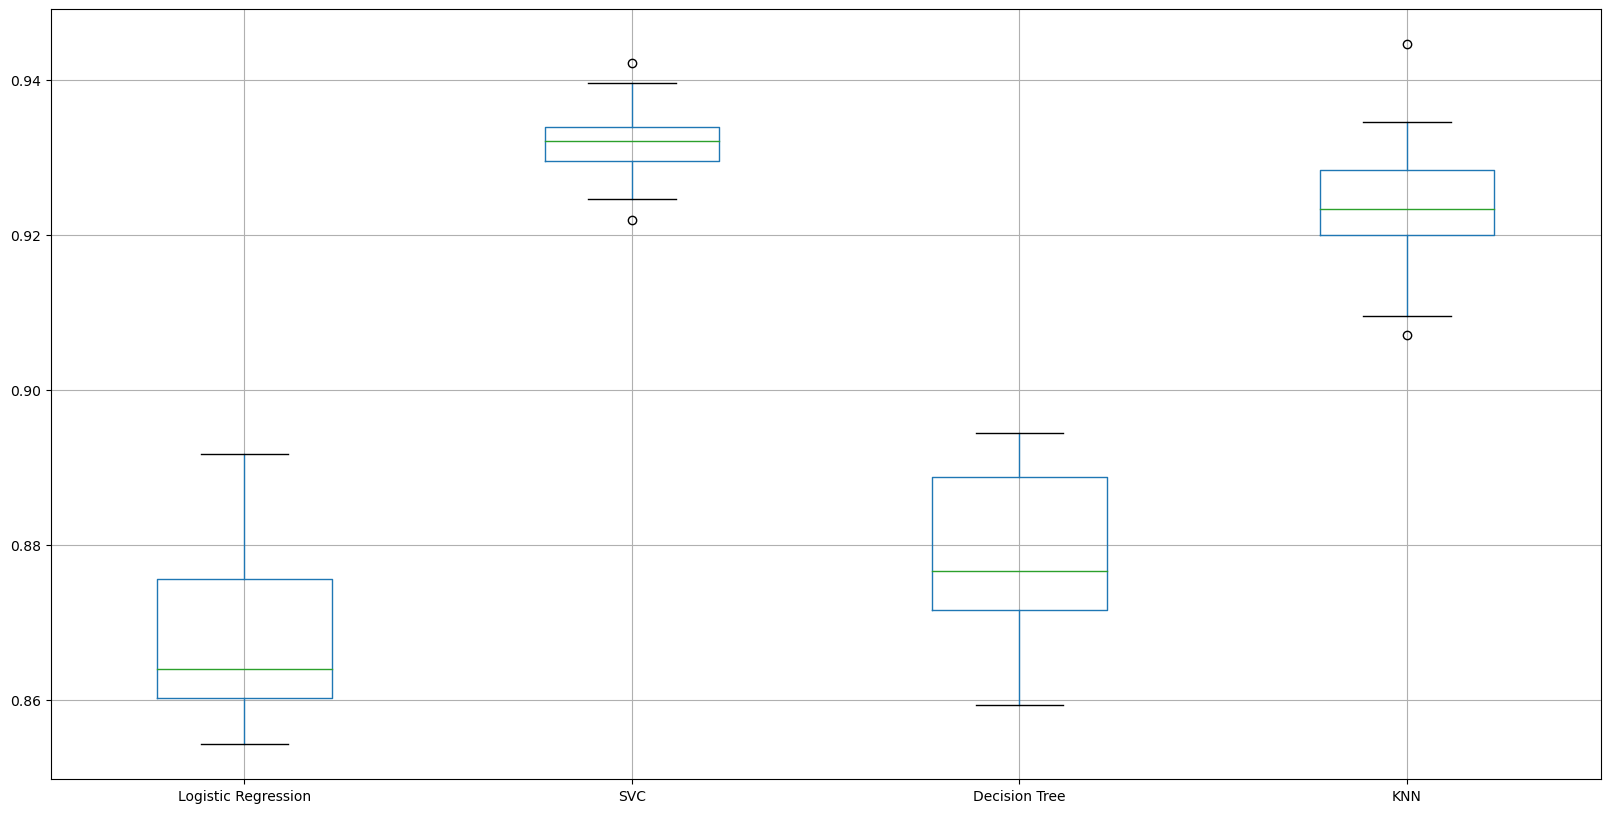

In [128]:
table.boxplot()

SVC perfoms the best with highest accuracy of 0.942211

# Ensemble Techinques

In [129]:
ensemble = []

ensemble.append(('Ada Boost', Pipeline([('Scaler',StandardScaler()), ('model', AdaBoostClassifier())])))
ensemble.append(('Gradient Boosting', Pipeline([('Scaler',StandardScaler()), ('model', GradientBoostingClassifier())])))
ensemble.append(('Random Forest', Pipeline([('Scaler',StandardScaler()), ('model', RandomForestClassifier())])))
ensemble.append(('XG Boosting', Pipeline([('Scaler',StandardScaler()), ('model', XGBClassifier())])))


results = []

for name, model in ensemble:
    kfold = KFold(n_splits=10)
    cv = cross_val_score(model, xtrain,ytrain, cv=kfold, scoring='accuracy')
    results.append(cv)
    print(f'Model: {name} Accuracy: {cv.mean()}')

Model: Ada Boost Accuracy: 0.8784932217763883
Model: Gradient Boosting Accuracy: 0.9272964317810717
Model: Random Forest Accuracy: 0.9355961166031671
Model: XG Boosting Accuracy: 0.9305665607635152


In [130]:
table2 = pd.DataFrame(results).T
table2.columns = ['Ada Boost', 'Gradient Boosting', 'Random Forest', 'XG Boosting' ]
table2

Ada Boost  Gradient Boosting  Random Forest  XG Boosting
0   0.871859           0.927136       0.937186     0.929648
1   0.869347           0.914573       0.932161     0.924623
2   0.871859           0.934673       0.942211     0.942211
3   0.874372           0.922111       0.922111     0.922111
4   0.894472           0.934673       0.949749     0.932161
5   0.879093           0.911839       0.921914     0.916877
6   0.869018           0.939547       0.939547     0.931990
7   0.884131           0.931990       0.931990     0.929471
8   0.879093           0.926952       0.939547     0.944584
9   0.891688           0.929471       0.939547     0.931990

<Axes: >

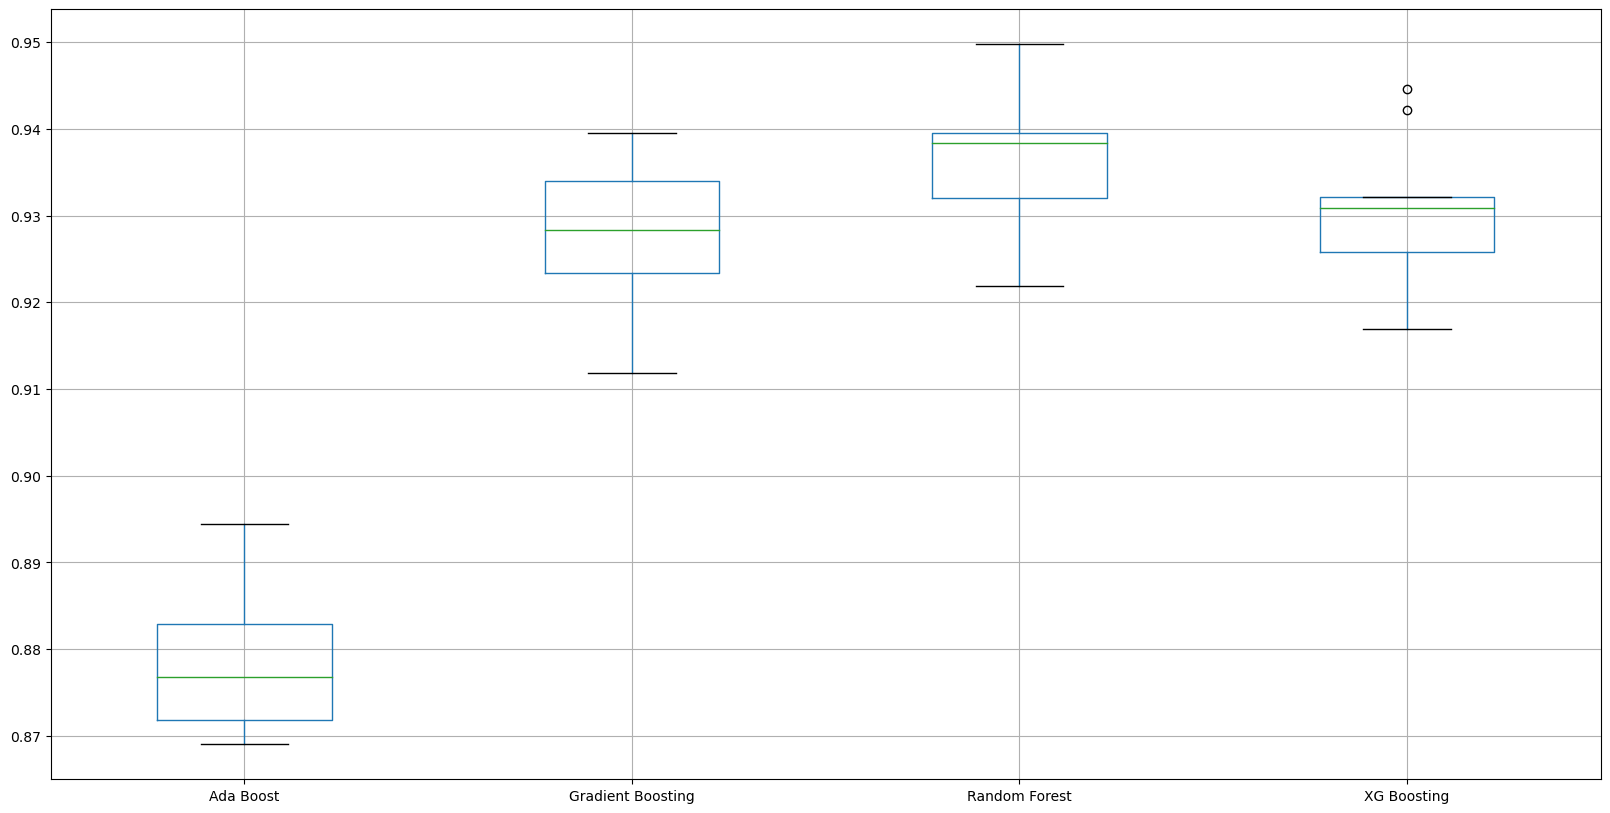

In [131]:
table2.boxplot()

Random Forest perfoms the best with highest accuracy of 0.937186

# Oversampling the Imbalanced Data

In [133]:
from imblearn.over_sampling import RandomOverSampler

In [134]:
ros = RandomOverSampler(random_state=1)

x_re,y_re = ros.fit_resample(x,y)

In [142]:
y_re.value_counts()

0    4264
1    4264
Name: churn, dtype: int64

# Models with balanced dataset (SMOTE)

In [146]:
models = []

models.append(('Logistic Regression', Pipeline([('Scaler',StandardScaler()), ('model', LogisticRegression())])))
models.append(('SVC', Pipeline([('Scaler',StandardScaler()), ('model', SVC())])))
models.append(('Decision Tree', Pipeline([('Scaler',StandardScaler()), ('model', DecisionTreeClassifier())])))
models.append(('KNN', Pipeline([('Scaler',StandardScaler()), ('model', KNeighborsClassifier())])))

results = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv = cross_val_score(model, x_re,y_re, cv=kfold, scoring='accuracy')
    results.append(cv)
    print(f'Model: {name}---> Accuracy: {cv.mean()}')

Model: Logistic Regression---> Accuracy: 0.6546611242287645
Model: SVC---> Accuracy: 0.8055498681813429
Model: Decision Tree---> Accuracy: 0.9602579132473622
Model: KNN---> Accuracy: 0.8714999256972078


In [147]:
table = pd.DataFrame(results).T
table.columns = ['Logistic Regression', 'SVC', 'Decision Tree', 'KNN' ]
table

Logistic Regression       SVC  Decision Tree       KNN
0             0.630715  0.887456       0.937866  0.819461
1             0.690504  0.899179       0.926143  0.804220
2             0.672919  0.876905       0.935522  0.800703
3             0.674091  0.905041       0.916764  0.788980
4             0.674091  0.887456       0.936694  0.814771
5             0.698710  0.866354       0.949590  0.868699
6             0.617819  0.694021       1.000000  0.966002
7             0.628370  0.698710       1.000000  0.957796
8             0.627934  0.665493       1.000000  0.955399
9             0.631455  0.674883       1.000000  0.938967

<Axes: >

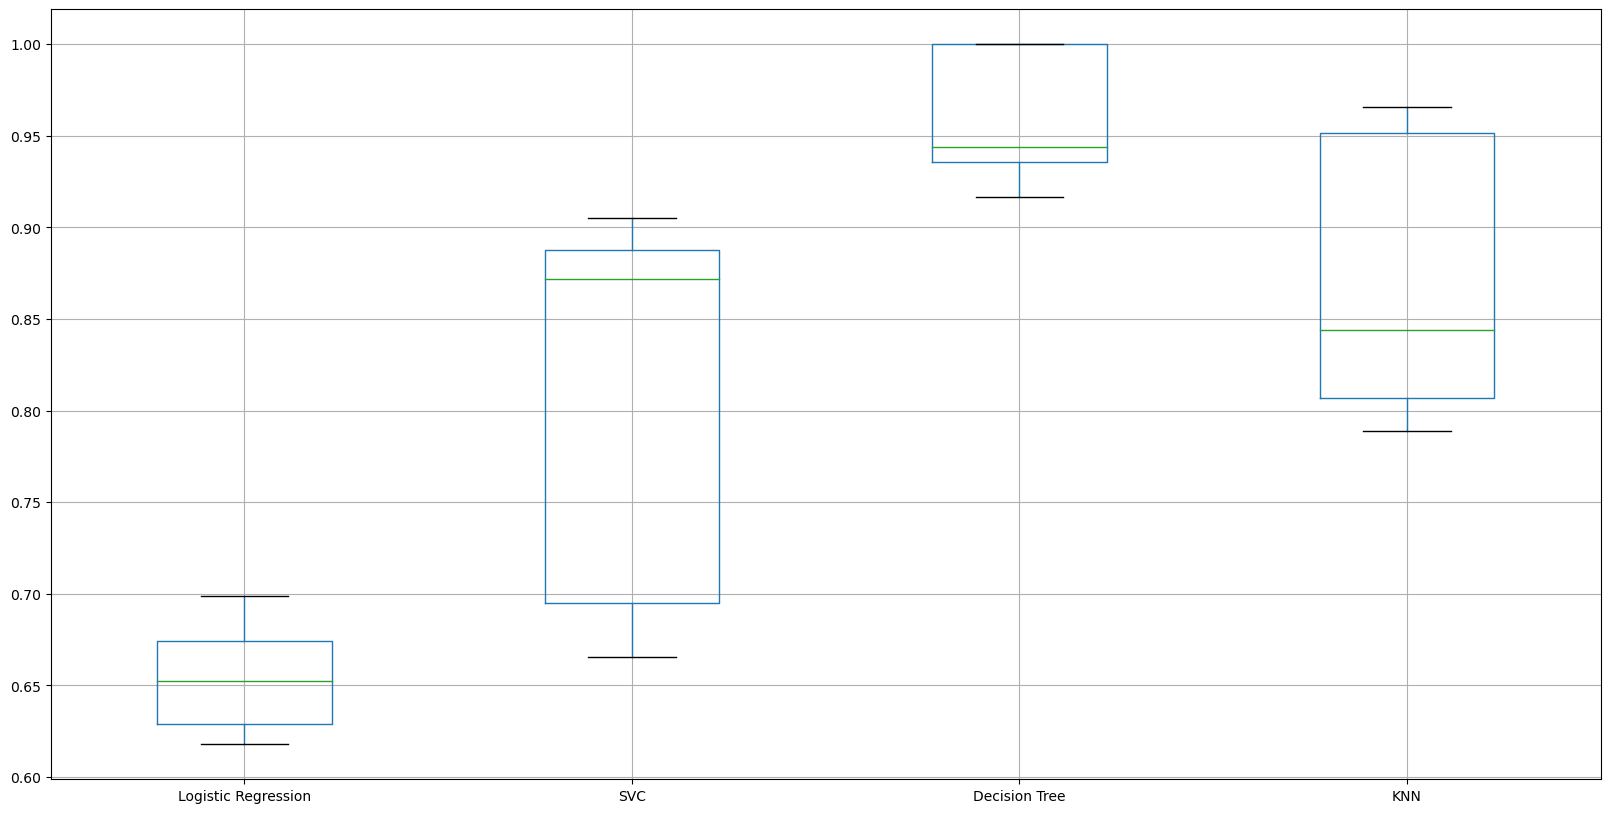

In [148]:
table.boxplot()

Decision Tree perfoms the best with highest accuracy of 0.944606

# Ensemble Techinques

In [149]:
ensemble = []

ensemble.append(('Ada Boost', AdaBoostClassifier()))
ensemble.append(('Gradient Boosting', GradientBoostingClassifier()))
ensemble.append(('Random Forest', RandomForestClassifier()))
ensemble.append(('XG Boosting', XGBClassifier()))


results = []

for name, model in ensemble:
    kfold = KFold(n_splits=10)
    cv = cross_val_score(model, x_re,y_re, cv=kfold, scoring='accuracy')
    results.append(cv)
    print(f'Model: {name} Accuracy: {cv.mean()}')

Model: Ada Boost Accuracy: 0.7631149932026705
Model: Gradient Boosting Accuracy: 0.8076662593772875
Model: Random Forest Accuracy: 0.9890973036342322
Model: XG Boosting Accuracy: 0.9606001188844674


In [150]:
table2 = pd.DataFrame(results).T
table2.columns = ['Ada Boost', 'Gradient Boosting', 'Random Forest', 'XG Boosting' ]
table2

Ada Boost  Gradient Boosting  Random Forest  XG Boosting
0   0.800703           0.865182       0.976553     0.943728
1   0.825322           0.893318       0.975381     0.955451
2   0.812427           0.879250       0.984760     0.949590
3   0.832356           0.879250       0.985932     0.967175
4   0.806565           0.873388       0.978898     0.954279
5   0.824150           0.864009       0.989449     0.967175
6   0.685815           0.718640       1.000000     0.971864
7   0.672919           0.710434       1.000000     0.977726
8   0.670188           0.693662       1.000000     0.957746
9   0.700704           0.699531       1.000000     0.961268

<Axes: >

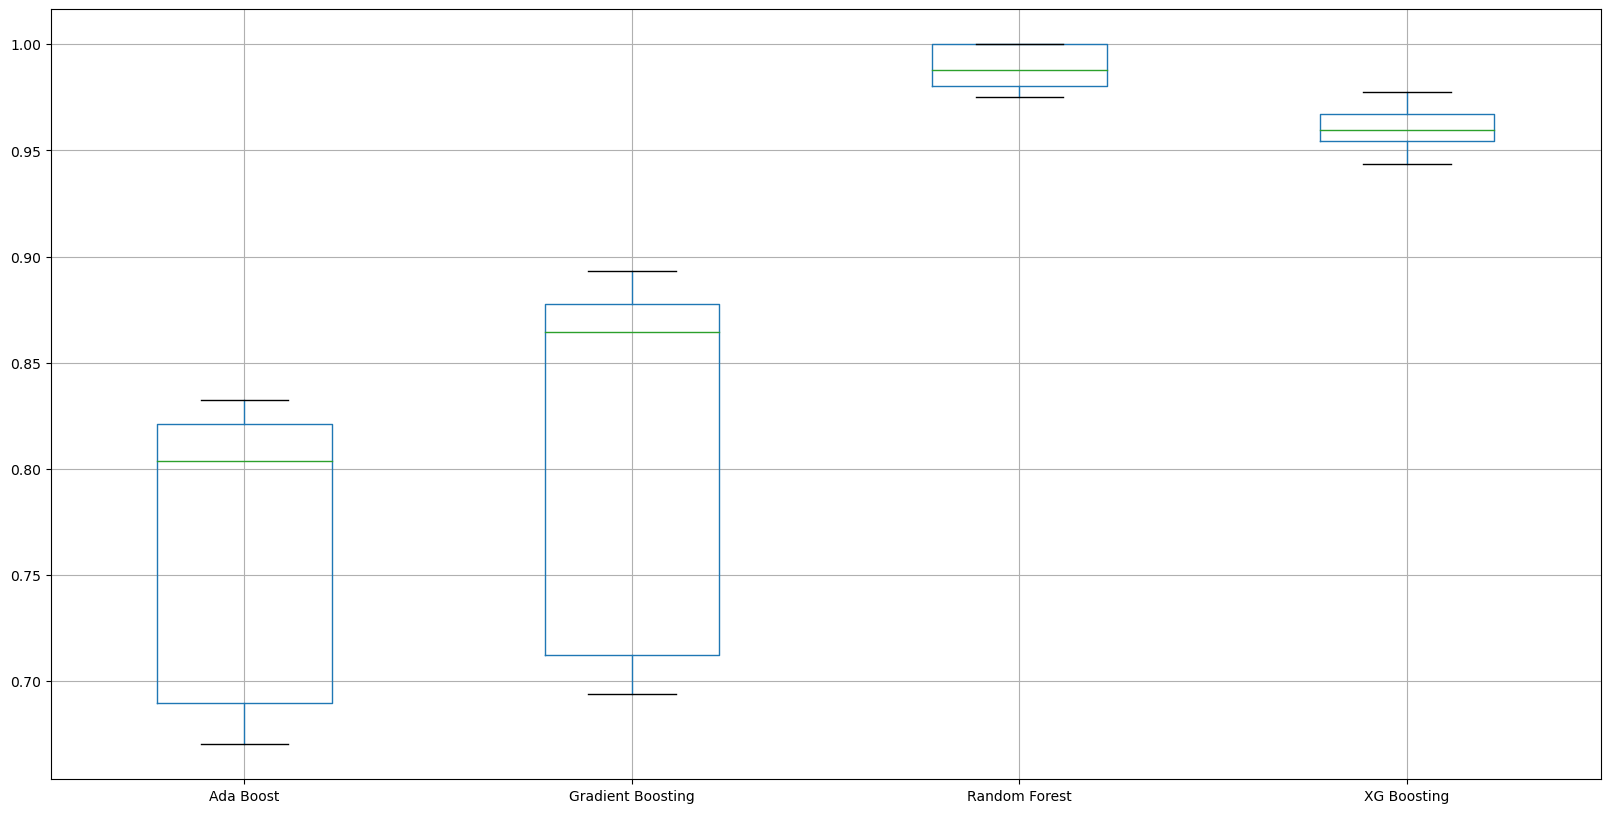

In [151]:
table2.boxplot()

Random Forest perfoms the best with highest accuracy of 0.943149



Observations -

- Algorithms when implemented with SMOTE technique, show good resultes in terms of accuracy than without SMOTE algorithms. This is due to the balancing of data.

Conclusion -
- Based on the above observations, RandomForest (with SMOTE) is the best model, hence considered for Hyperparameter Tuning.

# Final Model

In [152]:
from sklearn.preprocessing import OneHotEncoder

In [154]:
df_final['churn'] = df_final['churn'].map({0.0:'no', 1.0:'yes'})

In [156]:
transformer = ColumnTransformer(transformers=[
    ('tf2', StandardScaler(), [0,1,2,3,4]),   
    #('tf3', LabelEncoder(),[5])    
], remainder= 'passthrough')

In [158]:
X = df_final.iloc[:,:-1]
Y = df_final['churn']

In [159]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.25, random_state=1)

In [160]:
rf = Pipeline(steps=[('transform', transformer), ('model', RandomForestClassifier())])
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

In [161]:
ypred

array(['no', 'no', 'no', ..., 'no', 'yes', 'no'], dtype=object)

In [162]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

          no       1.00      0.97      0.99      1093
         yes       0.97      1.00      0.98      1039

    accuracy                           0.98      2132
   macro avg       0.99      0.99      0.98      2132
weighted avg       0.99      0.98      0.98      2132



In [163]:
print(rf.score(xtrain,ytrain))
print(rf.score(xtest,ytest))

1.0
0.9849906191369606


In [164]:
matrix = confusion_matrix(ytest, ypred)
print('Confusion Matrix\n', matrix)

Confusion Matrix
 [[1063   30]
 [   2 1037]]


# Hyperparameter Tuning

In [165]:
df_hyp = df_final.copy()
df_hyp

Voice_messages  Night_mins  Evening_mins  Day_charge  Customer_calls  \
0                 25       244.7         197.4       45.07               1   
1                 26       254.4         195.5       27.47               1   
2                  0       162.6         121.2       41.38               0   
3                  0       196.9          61.9       50.90               2   
4                  0       186.9         148.3       28.34               3   
...              ...         ...           ...         ...             ...   
8523               0       323.7         205.4       34.00               0   
8524               0       227.2         132.8       38.86               9   
8525              29       190.5         217.7       37.52               1   
8526              33       164.6         248.2       29.73               1   
8527               0       200.2         187.7       24.41               3   

     churn  
0       no  
1       no  
2       no  
3       no  
4       no  
...    ...  
8523   yes  
8524   yes  
8525   yes  
8526   yes  
8527   yes  

[8528 rows x 6 columns]

In [166]:
df_hyp['churn'] = le.fit_transform(df_hyp['churn'])

In [167]:
x = df_hyp.iloc[:,:-1]
y = df_hyp.iloc[:,-1]

In [168]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2, random_state=1)

In [169]:
params = {
    'n_estimators': [150,200,250,300],
    'max_depth' : [3,4,5],
    'criterion' : ["gini", "entropy", "log_loss"]
}

In [170]:
grid = GridSearchCV(RandomForestClassifier(),param_grid= params)
grid.fit(xtrain, ytrain)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [150, 200, 250, 300]})

In [179]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 150}

In [171]:
grid.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=150)

In [172]:
grid.best_score_

0.8012336051045729

In [173]:
df_final

Voice_messages  Night_mins  Evening_mins  Day_charge  Customer_calls  \
0                 25       244.7         197.4       45.07               1   
1                 26       254.4         195.5       27.47               1   
2                  0       162.6         121.2       41.38               0   
3                  0       196.9          61.9       50.90               2   
4                  0       186.9         148.3       28.34               3   
...              ...         ...           ...         ...             ...   
8523               0       323.7         205.4       34.00               0   
8524               0       227.2         132.8       38.86               9   
8525              29       190.5         217.7       37.52               1   
8526              33       164.6         248.2       29.73               1   
8527               0       200.2         187.7       24.41               3   

     churn  
0       no  
1       no  
2       no  
3       no  
4       no  
...    ...  
8523   yes  
8524   yes  
8525   yes  
8526   yes  
8527   yes  

[8528 rows x 6 columns]

In [174]:
x = df_final.iloc[:,:-1]
y = df_final.iloc[:,-1]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25, random_state=1)

In [175]:
transformer = ColumnTransformer(transformers=[
    ('tf2', StandardScaler(), [0,1,2,3,4])
], remainder= 'passthrough')

In [184]:
final_model1 = Pipeline(steps=[('transform', transformer), ('model', RandomForestClassifier())])
final_model1.fit(xtrain,ytrain)
ypred = final_model1.predict(xtest)

In [185]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

          no       1.00      0.98      0.99      1093
         yes       0.97      1.00      0.99      1039

    accuracy                           0.99      2132
   macro avg       0.99      0.99      0.99      2132
weighted avg       0.99      0.99      0.99      2132



In [186]:
print(final_model1.score(xtrain,ytrain))
print(final_model1.score(xtest,ytest))

1.0
0.9863977485928705


# Deployment

In [187]:
pickle.dump(final_model1, open('Final_model.pkl', 'wb'))